<a href="https://colab.research.google.com/github/AAdewunmi/Laptop_Prices_Prediction_Project/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Laptop Price Prediction Analysis

Objective:

This project is about predicting the price of laptops based on several features.
The workflow is similar to any other end to end, full stack data science supervised learning project i.e. we load the data into pandas data frame, we do exploratory data analysis (EDA), model building, select an algorithm for prediction, then we do hyperparameter tuning of the algorithm.


In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load project data
# sample data can be found in '/sample_data/laptop_data.csv'
df = pd.read_csv('/content/sample_data/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
# Display all columns
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# Remove Unnamed column (Col 0)
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
# Check DataFrame has null values
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [6]:
# Check for duplicate rows
int(df.duplicated().sum())

29

In [7]:
# Print information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
# Separate the category features and numerical features
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
catvars, numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [9]:
# Find and count unique values present in a particular column
def uniquevals(col):
  print(f'Details of the particular col {col} is : {df[col].unique()}')


def valuecounts(col):
  print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')


for col in df.columns:
  uniquevals(col)
  print("-"*75)


Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [10]:
import pandas as pd
from io import StringIO

def convert_to_numeric(series, unit_to_remove, dtype):
    """
    Removes a specified unit from string values in a Series and converts it to a numeric dtype.

    Args:
        series (pd.Series): The Series to process.
        unit_to_remove (str): The unit string to remove (e.g., 'GB', 'kg').
        dtype (str): The target numeric dtype ('int32', 'float32').

    Returns:
        pd.Series: The converted Series.
    """
    try:
        cleaned_series = series.str.replace(unit_to_remove, '', regex=False).astype(dtype)
        return cleaned_series
    except AttributeError:
        print(f"Warning: Column already seems to be non-string, attempting direct conversion to {dtype}.")
        try:
            return series.astype(dtype)
        except ValueError as e:
            print(f"Error converting to {dtype}: {e}")
            return series

# Apply the conversion functions using .loc for assignment
df.loc[:, 'Ram'] = convert_to_numeric(df['Ram'], 'GB', 'int32')
df.loc[:, 'Weight'] = convert_to_numeric(df['Weight'], 'kg', 'float32')

print(df.head())
print(df.info())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu Ram               Memory  \
0        Intel Core i5 2.3GHz   8            128GB SSD   
1        Intel Core i5 1.8GHz   8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3        Intel Core i7 2.7GHz  16            512GB SSD   
4        Intel Core i5 3.1GHz   8            256GB SSD   

                            Gpu  OpSys Weight        Price  
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832  
1        Intel HD Graphics 6000  macOS   1.34   47895.5232  
2         Intel HD Graphics 620  No OS   1.86   30636.0000 

In [11]:
# Print information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


# Exploratory Data Analysis (EDA)

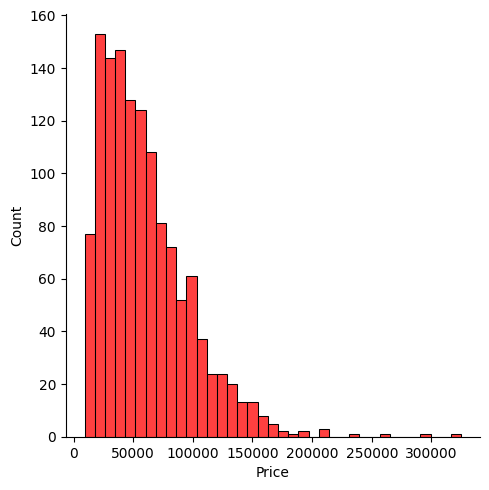

In [12]:
# Display the distribution of price.
sn.displot(df['Price'], color='red')

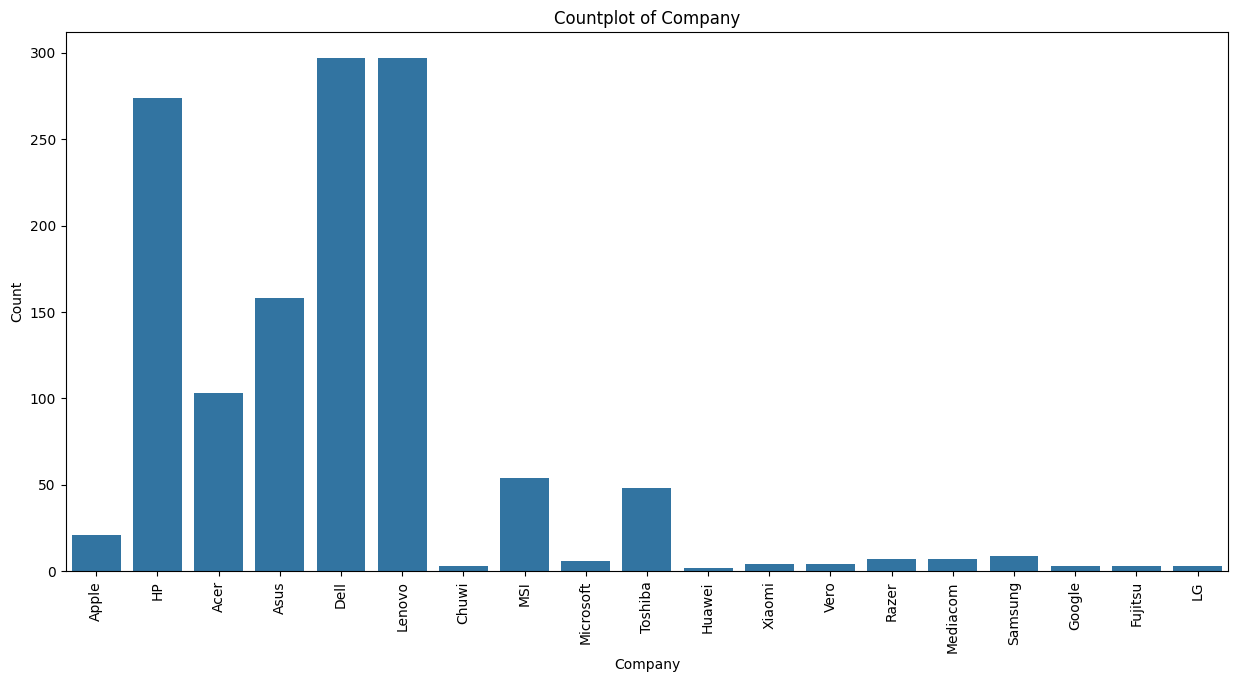

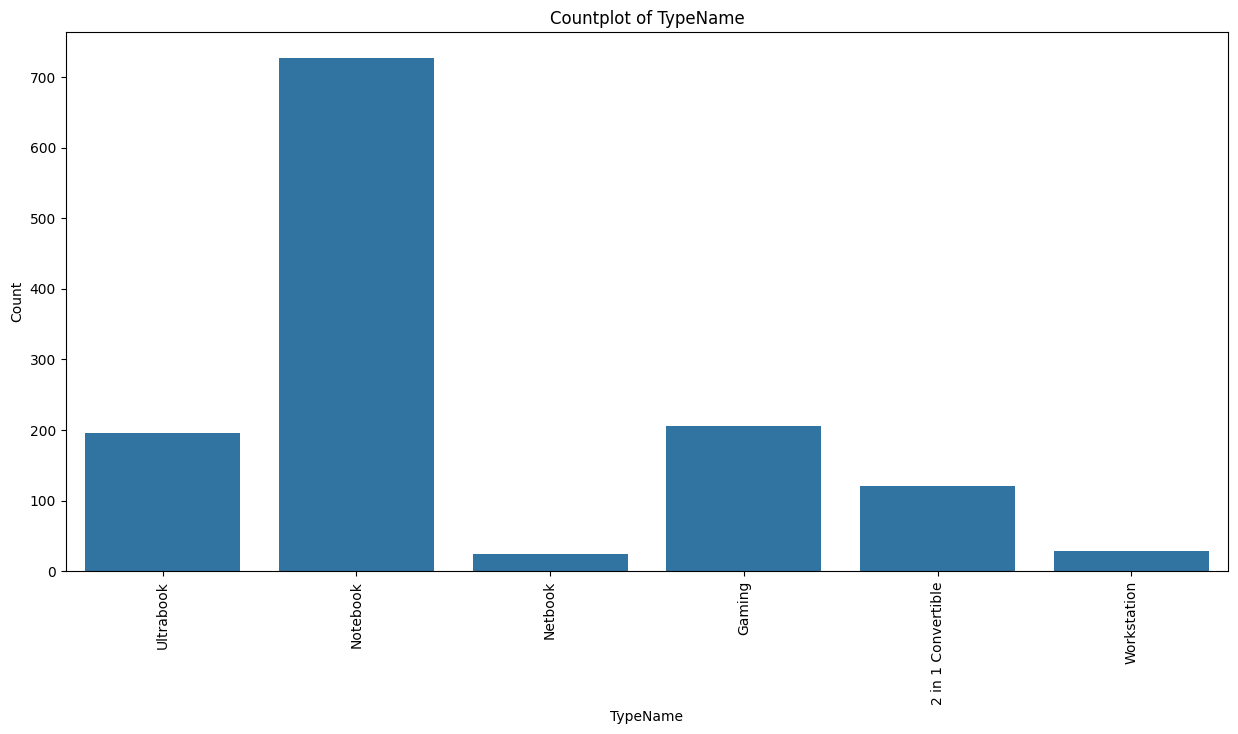

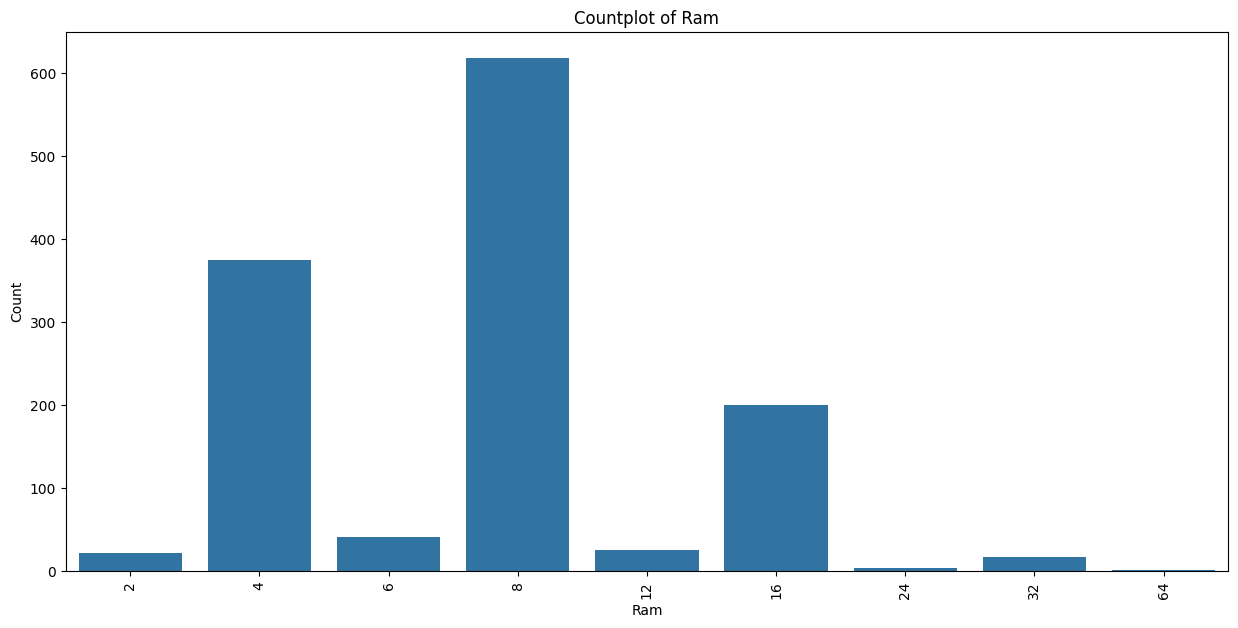

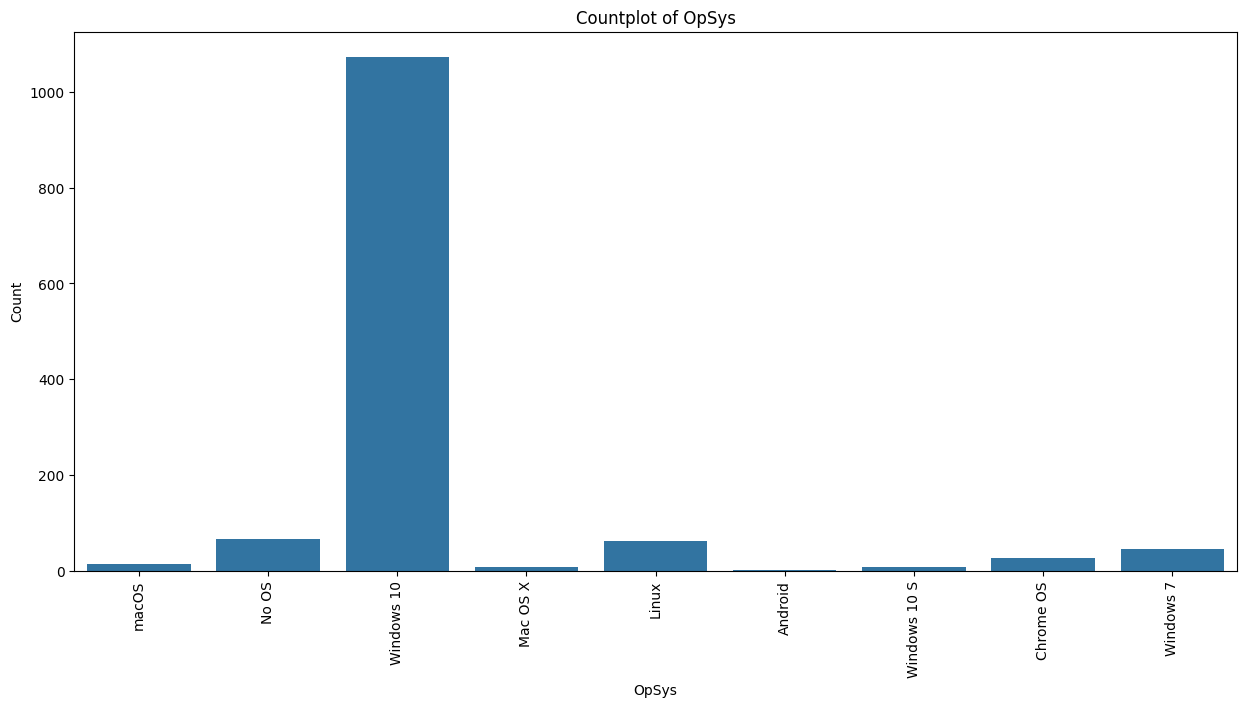

In [13]:
# Display countplots for the categorical variables
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def drawplot(col):
  plt.figure(figsize=(15,7))
  sn.countplot(x=df[col])
  plt.xticks(rotation='vertical')
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
  drawplot(col)

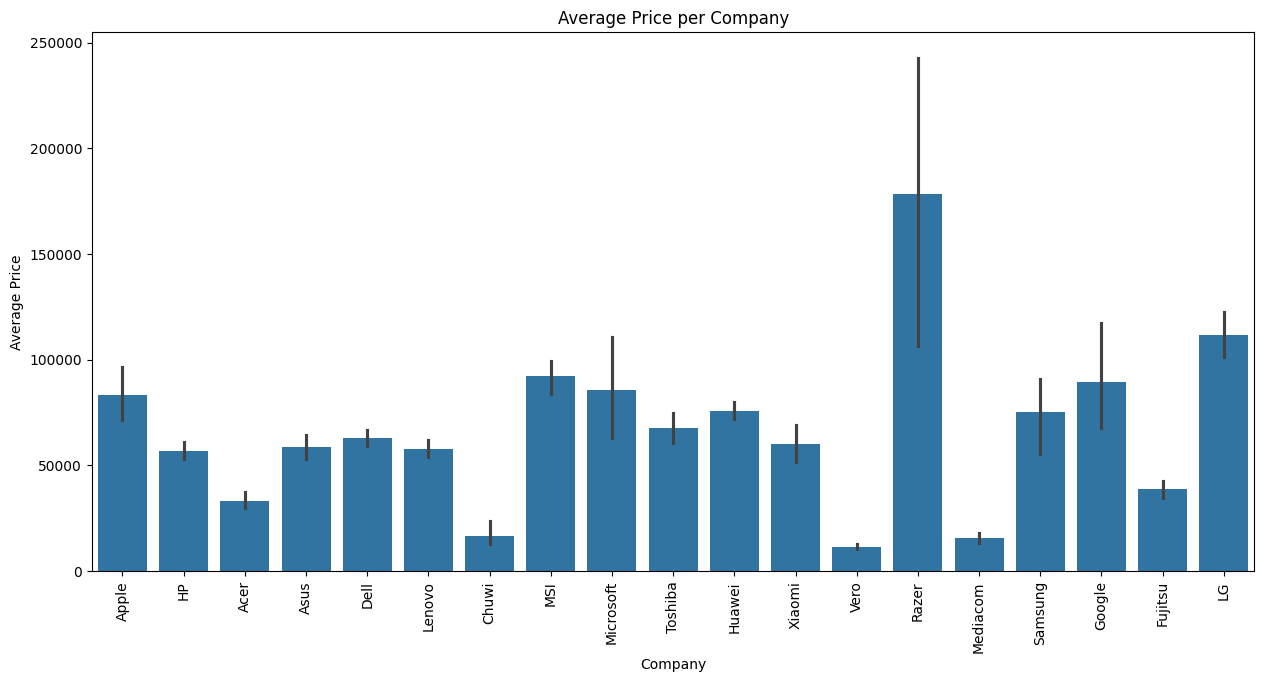

In [14]:
# Display average price for each of the laptop brands
# this will give us an insight into the variation
# in laptop pricing between companies.

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def draw_barplot_company_price(df):
  """
  Displays a bar plot of average price per company.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing 'Company' and 'Price' columns.
  """
  plt.figure(figsize=(15, 7))
  sn.barplot(x=df['Company'], y=df['Price'])
  plt.xticks(rotation='vertical')
  plt.title('Average Price per Company')
  plt.xlabel('Company')
  plt.ylabel('Average Price')
  plt.show()

# Call the function with your DataFrame
draw_barplot_company_price(df)


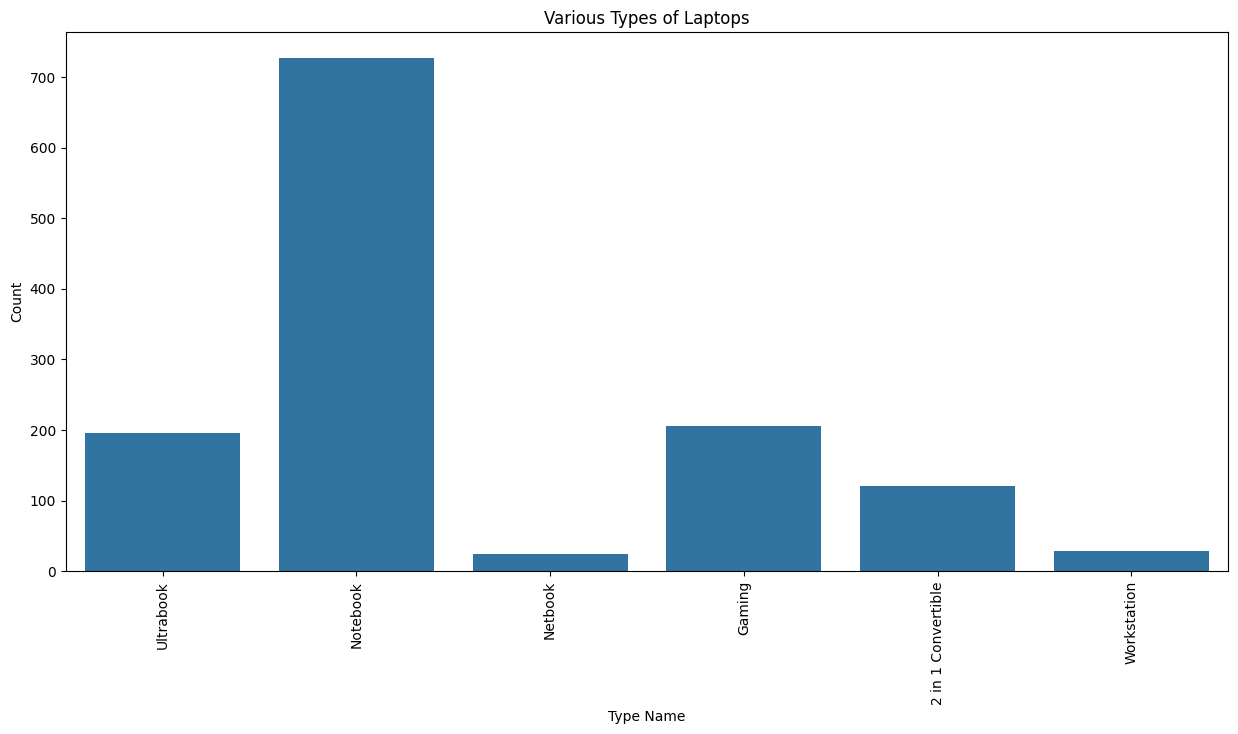

In [15]:
# Display various types of Laptops

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def plot_laptop_types(dataframe, palette='autumn'):
  """
  Displays a countplot of different laptop types.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing the 'TypeName' column.
    palette (str, optional): The color palette to use for the plot. Defaults to 'autumn'.
  """
  plt.figure(figsize=(15, 7))
  sn.countplot(x=dataframe['TypeName'])
  plt.xticks(rotation='vertical')
  plt.title('Various Types of Laptops')
  plt.xlabel('Type Name')
  plt.ylabel('Count')
  plt.show()

# Call the function
plot_laptop_types(df)

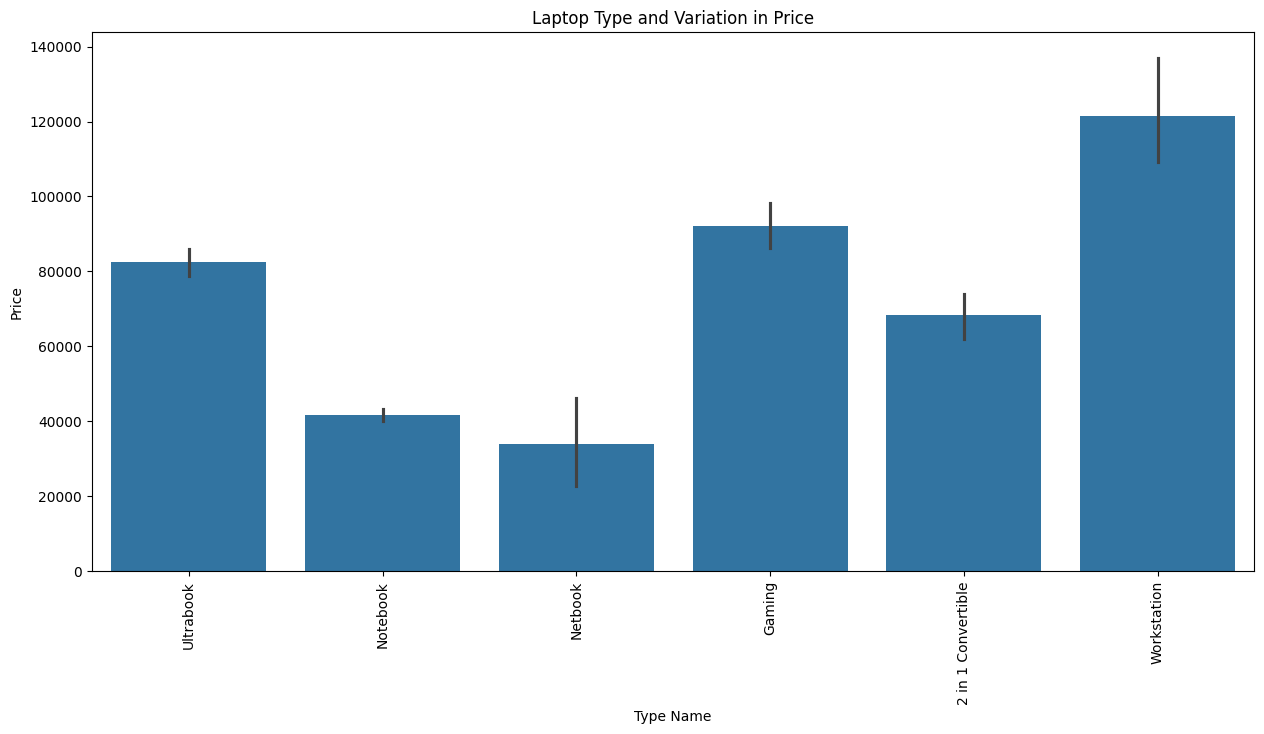

In [16]:
# Display laptop type and variation in price

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def plot_type_price_variation(dataframe):
  """
  Displays a bar plot showing the variation in price for each laptop type.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing 'TypeName' and 'Price' columns.
  """
  plt.figure(figsize=(15, 7))
  sn.barplot(x=dataframe['TypeName'], y=dataframe['Price'])
  plt.xticks(rotation='vertical')
  plt.title('Laptop Type and Variation in Price')
  plt.xlabel('Type Name')
  plt.ylabel('Price')
  plt.show()

# Call the function
plot_type_price_variation(df)

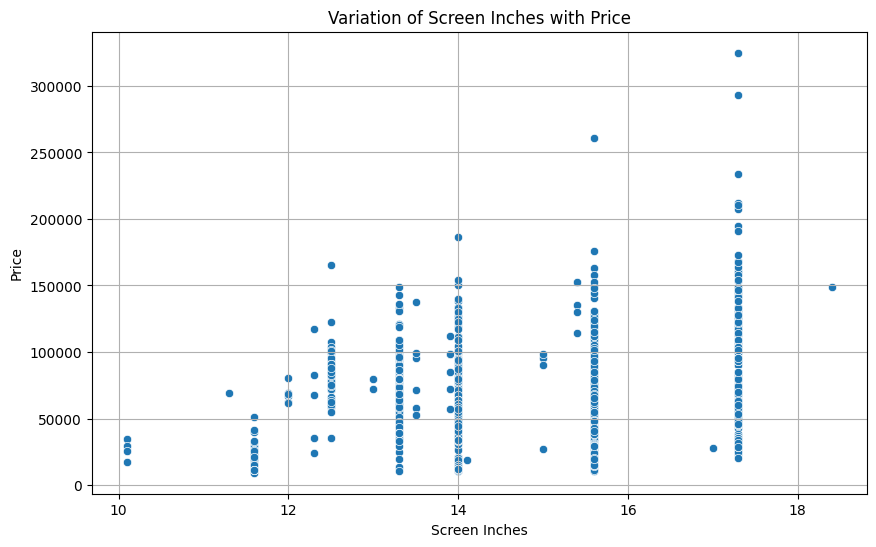

In [17]:
# Display variation of screen inches with price

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def plot_screen_size_price(dataframe):
  """
  Displays a scatter plot showing the variation of screen inches with price.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing 'Inches' and 'Price' columns.
  """
  plt.figure(figsize=(10, 6))
  sn.scatterplot(x=dataframe['Inches'], y=dataframe['Price'])
  plt.title('Variation of Screen Inches with Price')
  plt.xlabel('Screen Inches')
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()

# Call the function
plot_screen_size_price(df)

In [18]:
# Display screen resolution count
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [19]:
# Create a new column, touchscreen, with the condition
# if the value of touchscreen is 1, then the laptop is a
# touchscreen laptop.

df['TouchScreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)
df.head()
touchscreen_laptops = df[df['TouchScreen'] == 1]
print(touchscreen_laptops.head(10))


       Company            TypeName  Inches  \
19        Dell           Ultrabook    13.3   
23        Dell  2 in 1 Convertible    13.3   
33        Dell           Ultrabook    13.3   
44        Dell  2 in 1 Convertible    17.3   
50      Lenovo  2 in 1 Convertible    10.1   
70   Microsoft           Ultrabook    13.5   
95        Acer  2 in 1 Convertible    13.3   
104  Microsoft           Ultrabook    13.5   
111       Dell           Ultrabook    13.3   
112     Lenovo  2 in 1 Convertible    13.3   

                              ScreenResolution                          Cpu  \
19   IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i5 8250U 1.6GHz   
23             Full HD / Touchscreen 1920x1080   Intel Core i5 8250U 1.6GHz   
33            Touchscreen / Quad HD+ 3200x1800   Intel Core i7 8550U 1.8GHz   
44             Full HD / Touchscreen 1920x1080   Intel Core i5 8250U 1.6GHz   
50             IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz   
70                 

In [20]:
# Display last 5 rows in the DataFrame
df.tail(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2,19660.32,0


In [21]:
# Display a 5 random rows in the DataFrame
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
162,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,38787.84,0
316,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.29,130482.72,1
214,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,79866.72,0
383,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.5,58554.72,0
398,Dell,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,144495.36,1


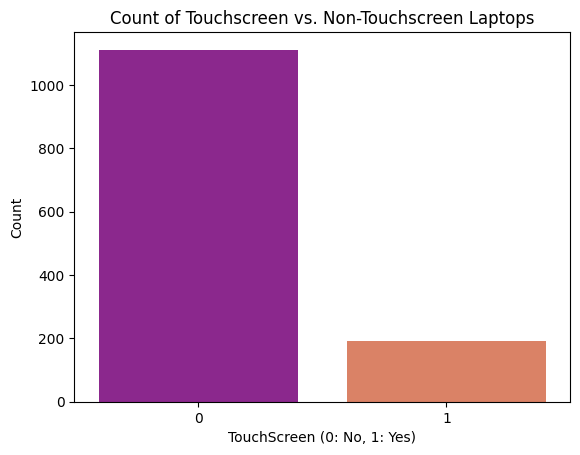

In [22]:
# Create countplot of TouchScreen and Plasma
import seaborn as sn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sn.countplot(x=df['TouchScreen'], palette='plasma')
plt.title('Count of Touchscreen vs. Non-Touchscreen Laptops')
plt.xlabel('TouchScreen (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

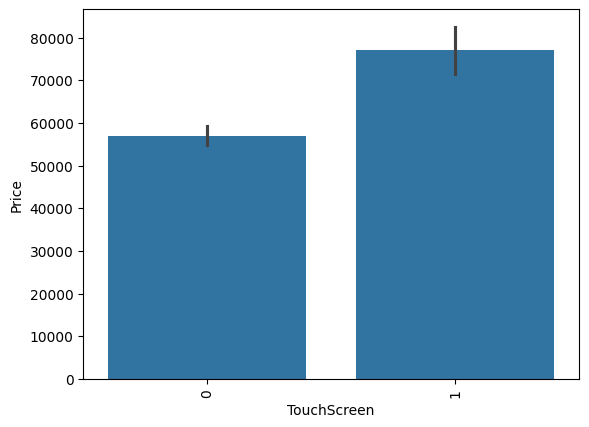

In [23]:
# Comparison between Touch Screen and Price of Laptop
sn.barplot(x = df['TouchScreen'], y = df['Price'])
plt.xticks(rotation = 'vertical')

In [24]:
# Create a new col named IPS; does the laptop have IPS facility of not
df['IPS'] = df['ScreenResolution'].apply(lambda element : 1 if 'IPS' in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1017,Lenovo,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4,158135.0400,0,1
807,HP,Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04,33513.1200,0,0
1177,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,69530.4000,0,1
814,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,42081.0768,0,0
989,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.6,59620.3200,0,0


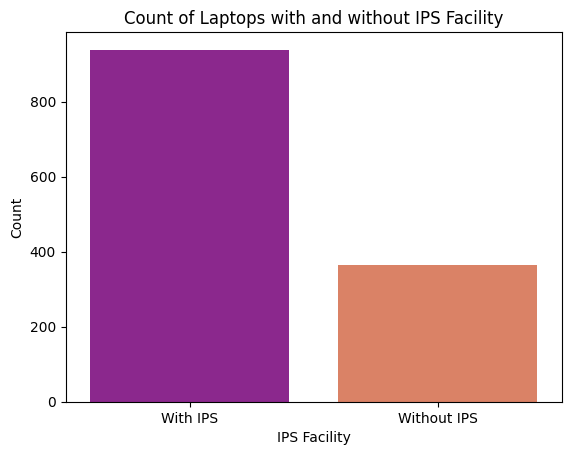

In [25]:
# Display count of laptops with and wihout IPS facility
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

sn.countplot(x=df['IPS'], palette='plasma')
plt.xlabel('IPS Facility')
plt.ylabel('Count')
plt.title('Count of Laptops with and without IPS Facility')
plt.xticks([0, 1], ['With IPS', 'Without IPS']) # To make the x-axis labels clearer
plt.show()

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

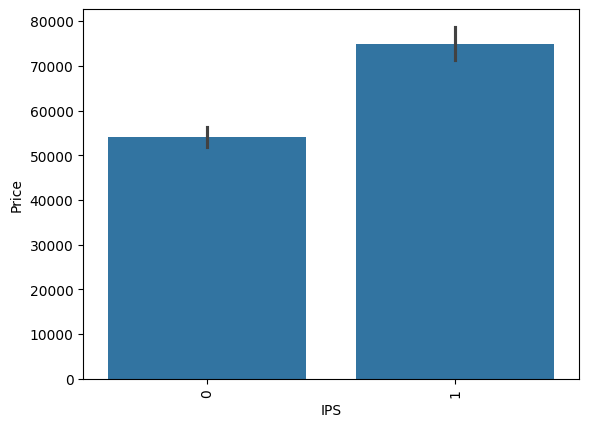

In [26]:
# Display price variation for IPS column
sn.barplot(x = df['IPS'], y = df['Price'])
plt.xticks(rotation = 'vertical')

# Feature Engineering: Extracting the X Resolution and the Y Resolution

In [27]:
from os.path import split
# We will split the text at the "x" letter and separate the 2 parts.
# From this, we can observe that one of the columns is Y res,
# so we will need to do some feature engineering on the X res column.

splitdf = df['ScreenResolution'].str.split('x', n = 1, expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
# Create two new columns i.e. X_res, Y_res

splitdf = df['ScreenResolution'].str.split('x', n = 1, expand=True)
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [29]:
# Extract numerical values from X_res column

df['X_res'] = df['X_res'].str.replace(',', '').str.extract(r'(\d+\.?\d+)')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [30]:
# Convert values in X_res, Y_res columns from string to integers

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 152.8+ KB


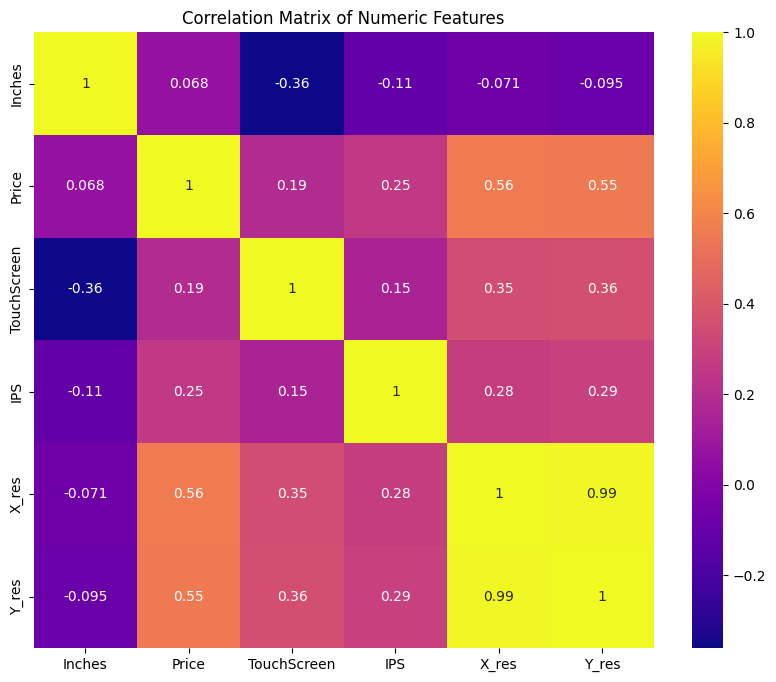

In [31]:
# Create a correlation map between features

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Assuming your DataFrame is named 'df'
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8)) # Adjusted figure size for better readability
sn.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [32]:
# Display correlation between price

numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr()['Price'])

Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [33]:
# Create new feature 'PPI(pixel per inch)' from X_res and Y_res

df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [34]:
# Display correlation between price and include PPI

numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr()['Price'])

Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64


In [35]:
# Drop columns: ScreenResolution, Inches, X_res, Y_res

import pandas as pd

try:

    print("Original DataFrame columns (for demonstration):", df.columns.tolist())

except NameError:

    print("DataFrame 'df' not found. Please ensure your DataFrame is loaded.")


Original DataFrame columns (for demonstration): ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS', 'X_res', 'Y_res', 'PPI']


In [36]:
# Display first 5 rows of DataFrame

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [37]:
# Extract the first 3 words of every row in CPU column
# into new CPU_name column

df['CPU_name'] = df['Cpu'].apply(lambda text: " ".join(text.split()[:3]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [38]:
# Reclassifying processor task

def processorType(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

df['CPU_name'] = df['CPU_name'].apply(lambda text:processorType(text))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


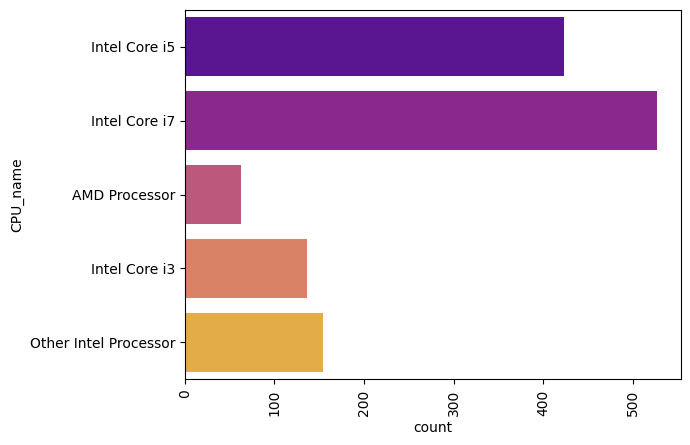

In [39]:
# Display countplot of CPU_name

sn.countplot(df['CPU_name'], palette='plasma')
plt.xticks(rotation='vertical');

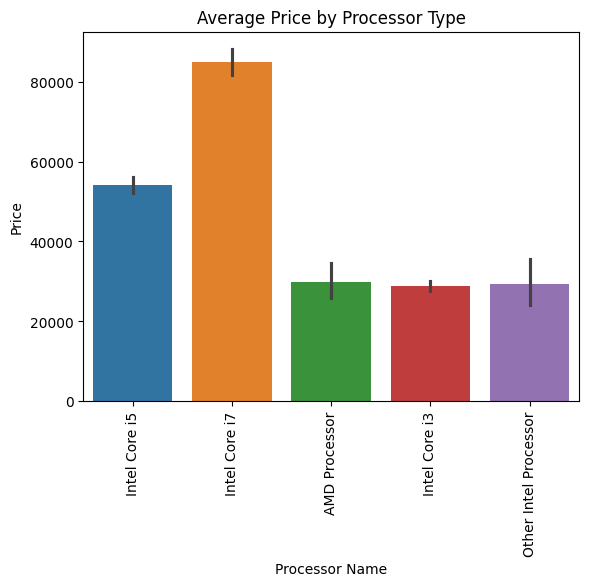

In [40]:
# Compare price and processor variation using a bar plot

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# We specify 'x' for the CPU_name, 'y' for the Price, and 'data' as our DataFrame df.
sn.barplot(x=df['CPU_name'], y=df['Price'], data=df, hue=df['CPU_name'])

# Rotate x-axis labels for better readability, especially if CPU names are long
plt.xticks(rotation='vertical')

# Add a title to the plot for clarity
plt.title('Average Price by Processor Type')

# Add labels to the axes
plt.xlabel('Processor Name')
plt.ylabel('Price')

# Display the plot
plt.show()

In [41]:
# Drop CPU column task

df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


**Analysis of RAM Column**

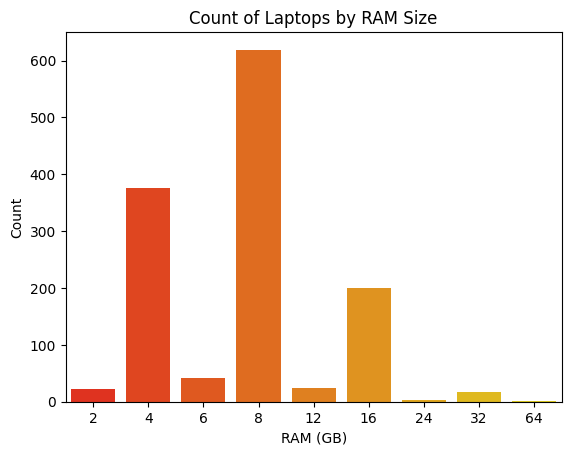

In [42]:
# Display countplot of RAM column

# --- Display countplot of RAM column ---
sn.countplot(x=df['Ram'], palette='autumn')

# Add a title and labels for clarity
plt.title('Count of Laptops by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')

# Display the plot
plt.show()

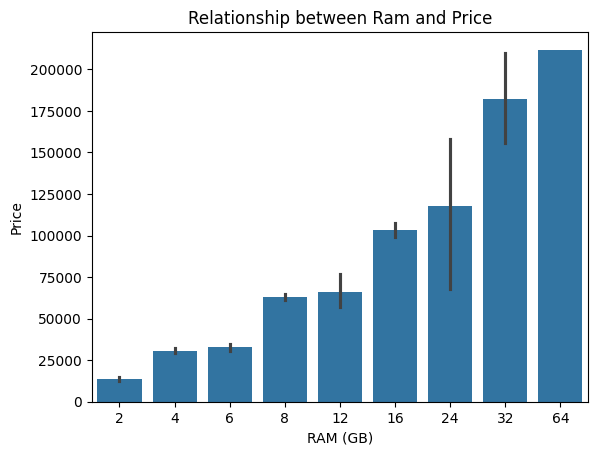

In [43]:
# Relationship between Ram and Price

import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

sn.barplot(x='Ram', y='Price', data=df)
plt.title('Relationship between Ram and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

**Analysis of Memory column**

In [44]:
# Display Types of memory and Value

df['Memory'].value_counts()


,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [45]:
# Classify the 4 most common variants: HHD, SSD, Flash, Hybrid

# 1. Remove decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)

# 2. Replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB', '')

# 3. Replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB', '000')

# 4. Split the word accross the "+" character

newdf = df['Memory'].str.split("+", n=1, expand=True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [46]:
# Strip white spaces task

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256 SSD


In [49]:
# Drop X_res, Y_res, Inches, ScreenResolution columns

import pandas as pd

print("Original DataFrame:")
print(df)

# Drop the columns 'X_res' and 'Y_res'
# 'axis=1' specifies that you are dropping columns
# 'inplace=True' modifies the DataFrame directly without needing to reassign it
df.drop(['X_res', 'Y_res', 'Inches', 'ScreenResolution'], axis=1, inplace=True)
print("\nDataFrame after dropping X_res and Y_res:")
print(df)

Original DataFrame:
     Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution Ram             Memory  \
0             IPS Panel Retina Display 2560x1600   8            128 SSD   
1                                       1440x900   8  128 Flash Storage   
2                              Full HD 1920x1080   8            256 SSD   
3             IPS Panel Retina Display 2880x1800  16            512 SSD   
4             IPS Panel Retina Display 2560x1600   8            256 SSD   
.

In [50]:
# Print first 5 rows of dataframe

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [51]:
# Implement storage type classification

def applychanges(value):
  df['Layer 1 ' + value] = df['first'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']

for value in listtoapply:
  applychanges(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer 1 HDD,Layer 1 SSD,Layer 1 Hybrid,Layer 1 FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [52]:
# Remove all characters and keep integers in first column task.

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

,count
first,
256 SSD,500
1000 HDD,225
128 SSD,172
512 SSD,138
500 HDD,132
32 Flash Storage,38
64 Flash Storage,16
2000 HDD,16
1000 SSD,16
